<a href="https://colab.research.google.com/github/Anant-agarwal123/big_cat_classifier/blob/main/big_cat_classifier_93.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version

Python 3.10.12


In [2]:
import os
import numpy as np
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
import tensorflow as tf
import tensorflow.keras as keras
from keras import Sequential, layers
from keras.models import model_from_json
from keras.models import load_model
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score
import joblib

In [3]:
tf.__version__

'2.15.0'

In [5]:
image_folder_path = "/content/drive/MyDrive/big cat classifier/big cat classifier"
list_of_folders = os.listdir(image_folder_path)
list_of_folders

['black panther',
 'puma',
 'cheetah',
 'tiger',
 'jaguar',
 'lion',
 'leopard',
 'cat']

In [6]:
images_path_list = []
label_list = []
for folder in list_of_folders:
    folder_path = os.path.join(image_folder_path,folder)
    images = os.listdir(folder_path)
    for image in images:
        image_path = os.path.join(folder_path,image)
        images_path_list.append(image_path)
        label_list.append(folder)

In [7]:
len(images_path_list)

1371

In [8]:
len(label_list)

1371

In [9]:
images_path_list = np.array(images_path_list)
label_list = np.array(label_list)


As the dataset we have is not very large, in place of splitting the dataset into train, cross-validation and test set, We will only divide it in train and cross-validation set.

In [10]:
x_train, x_cv, y_train, y_cv = train_test_split(images_path_list, label_list, test_size = 0.20)

In [11]:
len(x_train)

1096

In [12]:
len(x_cv)

275

In [13]:
ordinal_encoder = OrdinalEncoder()
y_list = label_list.copy()
y_list[:5]

array(['black panther', 'black panther', 'black panther', 'black panther',
       'black panther'], dtype='<U13')

In [14]:
y_list = ordinal_encoder.fit_transform(y_list.reshape(-1,1))
y_list[:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [15]:
y_list.reshape(len(y_list))

array([0., 0., 0., ..., 1., 1., 1.])

In [16]:
y_list = to_categorical(y_list, num_classes=8)
y_list

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [17]:
def from_simple_array_to_categorical(arr):
    arr=ordinal_encoder.transform(arr.reshape(-1,1))
    arr.reshape(len(arr))
    arr = to_categorical(arr, num_classes=8)
    return arr

In [18]:
y_train = from_simple_array_to_categorical(y_train)
y_cv = from_simple_array_to_categorical(y_cv)

In [19]:
avg_size=np.array([0,0])
for image in images_path_list:
    image = cv.imread(image)
    avg_size = avg_size + np.array(image.shape[:2])
avg_size = avg_size/len(images_path_list)
avg_size

array([184.79358133, 252.84682713])

so for the purpose of training all the images, we will resize every image before training or predicting to shape (180,180).

In [20]:
X_train = []
for imagepath in x_train:
  img = cv.imread(imagepath)
  img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  img = cv.resize(img, (180,180))
  X_train.append(img)

In [21]:
X_cv = []
for imagepath in x_cv:
  img = cv.imread(imagepath)
  img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  img = cv.resize(img, (180,180))
  X_cv.append(img)

In [22]:
X_train = np.array(X_train)
X_cv = np.array(X_cv)

array([[[135, 144,  97],
        [133, 143,  94],
        [131, 140,  90],
        ...,
        [117,  96,  59],
        [ 95,  78,  56],
        [ 86,  71,  62]],

       [[135, 144,  97],
        [133, 143,  94],
        [131, 140,  90],
        ...,
        [ 86,  66,  29],
        [ 60,  43,  19],
        [ 56,  41,  29]],

       [[135, 143,  96],
        [133, 141,  93],
        [131, 139,  89],
        ...,
        [ 65,  42,   7],
        [ 31,  12,   0],
        [ 27,   9,   0]],

       ...,

       [[157, 142,  98],
        [154, 137,  92],
        [156, 139,  88],
        ...,
        [ 91, 105,  30],
        [ 84,  98,  21],
        [ 82,  96,  19]],

       [[156, 141,  97],
        [153, 136,  91],
        [155, 139,  87],
        ...,
        [101, 115,  40],
        [ 94, 108,  31],
        [ 92, 106,  29]],

       [[154, 139,  96],
        [152, 135,  90],
        [156, 140,  88],
        ...,
        [108, 122,  47],
        [101, 115,  38],
        [ 99, 113,  36]]], dtype=uint8)
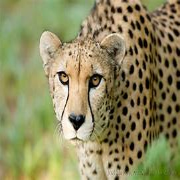

In [23]:
X_train[1095]

In [24]:
y_train[1095]

array([0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

array([[[  8,  52, 117],
        [  3,  48, 114],
        [  1,  49, 116],
        ...,
        [  5,  21,  70],
        [  0,  16,  67],
        [  6,  22,  73]],

       [[  7,  51, 116],
        [  3,  48, 114],
        [  1,  49, 115],
        ...,
        [  1,  17,  66],
        [  0,  12,  63],
        [  1,  16,  67]],

       [[  7,  51, 116],
        [  2,  47, 113],
        [  0,  48, 115],
        ...,
        [  2,  17,  68],
        [  0,  13,  64],
        [  0,  14,  65]],

       ...,

       [[  0,  32,  68],
        [  0,  27,  62],
        [  0,  19,  51],
        ...,
        [  0,   4,  33],
        [  1,   6,  35],
        [  0,   4,  33]],

       [[  9,  43,  79],
        [  5,  36,  71],
        [  3,  29,  61],
        ...,
        [  1,   6,  35],
        [  4,   9,  38],
        [ 10,  15,  44]],

       [[ 15,  49,  86],
        [  8,  39,  75],
        [ 10,  36,  69],
        ...,
        [  0,   5,  34],
        [  5,  10,  39],
        [ 19,  24,  53]]], dtype=uint8)
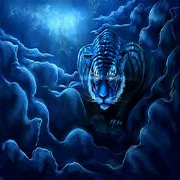

In [25]:
X_cv[274]

In [26]:
y_cv[274]

array([0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [27]:
X_train = X_train/255
X_cv = X_cv/255

# **VGG19**

In [28]:
VGG19_base_model = keras.applications.VGG19(
    include_top=False,
    weights="imagenet",
    pooling="max",
    classifier_activation="relu",
)

80134624/80134624 [==============================] - 4s 0us/step


In [29]:
big_cat_classifier_VGG19_model = Sequential([
    #base_model,
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.3),
    layers.RandomContrast(0.05),
    # layers.BatchNormalization(),
    # layers.Conv2D(filters = 32, activation="relu", kernel_size=3, padding="same"),
    # layers.MaxPooling2D(padding="same"),
    # layers.BatchNormalization(),
    # layers.Conv2D(filters = 32, activation="relu", kernel_size=3, padding="same"),
    # layers.MaxPooling2D(padding="same"),
    # layers.BatchNormalization(),
    # layers.Conv2D(filters = 32, activation="relu", kernel_size=3, padding="same"),
    # layers.MaxPooling2D(padding="same"),
    # layers.BatchNormalization(),
    # layers.Conv2D(filters = 32, activation="relu", kernel_size=3, padding="valid"),
    # layers.MaxPooling2D(padding="same"),
    # layers.BatchNormalization(),
    # layers.Conv2D(filters = 32, activation="relu", kernel_size=3, padding="valid"),
    # layers.MaxPooling2D(padding="same"),
    #layers.BatchNormalization(),
    VGG19_base_model,
    #layers.Conv2D(filters = 32, activation="relu", kernel_size=3, padding="valid"),
    #layers.MaxPooling2D(padding="same"),
    layers.Flatten(),
    #layers.Dropout(0.5),
    #layers.Dense(64, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(32, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(32, activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(8, activation="softmax"),
])

In [30]:
big_cat_classifier_VGG19_model.compile(optimizer="adamax",
    loss = "categorical_crossentropy",
    metrics=["accuracy"])

In [31]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath='VGG19_model_checkpoint_{epoch:02d}.weights.h5',
                                      monitor='val_loss',
                                      save_best_only=True,
                                      save_weights_only=True,
                                      verbose=1)

In [32]:
history = big_cat_classifier_VGG19_model.fit(X_train,
                                       y_train,
                                       epochs=10,
                                       validation_data=(X_cv,y_cv),
                                       callbacks=[checkpoint_callback])

Epoch 1/10
35/35 [==============================] - ETA: 0s - loss: 2.5019 - accuracy: 0.1597
Epoch 1: val_loss improved from inf to 9.56158, saving model to VGG19_model_checkpoint_01.weights.h5
35/35 [==============================] - 45s 593ms/step - loss: 2.5019 - accuracy: 0.1597 - val_loss: 9.5616 - val_accuracy: 0.1927
Epoch 2/10
35/35 [==============================] - ETA: 0s - loss: 2.2878 - accuracy: 0.1943
Epoch 2: val_loss improved from 9.56158 to 6.04055, saving model to VGG19_model_checkpoint_02.weights.h5
35/35 [==============================] - 12s 350ms/step - loss: 2.2878 - accuracy: 0.1943 - val_loss: 6.0405 - val_accuracy: 0.1127
Epoch 3/10
35/35 [==============================] - ETA: 0s - loss: 2.1300 - accuracy: 0.2117
Epoch 3: val_loss improved from 6.04055 to 5.76431, saving model to VGG19_model_checkpoint_03.weights.h5
35/35 [==============================] - 13s 366ms/step - loss: 2.1300 - accuracy: 0.2117 - val_loss: 5.7643 - val_accuracy: 0.1127
Epoch 4/10


this model is generalising very slowly and is also far from reaching a decent validation accuracy despite various finetunings. So we will now test other bigger CNN models.

# **MobileNet**

In [33]:
Mobilenet_base_model = keras.applications.MobileNetV2(
    alpha=1.3,
    include_top=False,
    weights="imagenet",
    pooling="max",
    classifier_activation="relu",
)

15441408/15441408 [==============================] - 2s 0us/step


In [34]:
big_cat_classifier_Mobilenet_model = Sequential([
    #base_model,
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.3),
    layers.RandomContrast(0.05),
    # layers.BatchNormalization(),
    # layers.Conv2D(filters = 32, activation="relu", kernel_size=3, padding="same"),
    # layers.MaxPooling2D(padding="same"),
    # layers.BatchNormalization(),
    # layers.Conv2D(filters = 32, activation="relu", kernel_size=3, padding="same"),
    # layers.MaxPooling2D(padding="same"),
    # layers.BatchNormalization(),
    # layers.Conv2D(filters = 32, activation="relu", kernel_size=3, padding="same"),
    # layers.MaxPooling2D(padding="same"),
    # layers.BatchNormalization(),
    # layers.Conv2D(filters = 32, activation="relu", kernel_size=3, padding="valid"),
    # layers.MaxPooling2D(padding="same"),
    # layers.BatchNormalization(),
    # layers.Conv2D(filters = 32, activation="relu", kernel_size=3, padding="valid"),
    # layers.MaxPooling2D(padding="same"),
    #layers.BatchNormalization(),
    Mobilenet_base_model,
    #layers.Conv2D(filters = 32, activation="relu", kernel_size=3, padding="valid"),
    #layers.MaxPooling2D(padding="same"),
    layers.Flatten(),
    #layers.Dropout(0.5),
    #layers.Dense(64, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(32, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(32, activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(8, activation="softmax"),
])

In [35]:
big_cat_classifier_Mobilenet_model.compile(optimizer="adamax",
    loss = "categorical_crossentropy",
    metrics=["accuracy"])

In [36]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath='Mobilenet_model_checkpoint_{epoch:02d}.weights.h5',
                                      monitor='val_loss',
                                      save_best_only=True,
                                      save_weights_only=True,
                                      verbose=1)

In [37]:
history = big_cat_classifier_Mobilenet_model.fit(X_train,
                                       y_train,
                                       epochs=10,
                                       validation_data=(X_cv,y_cv),
                                       callbacks=[checkpoint_callback])

Epoch 1/10
35/35 [==============================] - ETA: 0s - loss: 1.9344 - accuracy: 0.3193
Epoch 1: val_loss improved from inf to 2.40234, saving model to Mobilenet_model_checkpoint_01.weights.h5
35/35 [==============================] - 37s 267ms/step - loss: 1.9344 - accuracy: 0.3193 - val_loss: 2.4023 - val_accuracy: 0.3055
Epoch 2/10
34/35 [============================>.] - ETA: 0s - loss: 1.4811 - accuracy: 0.4798
Epoch 2: val_loss improved from 2.40234 to 2.02011, saving model to Mobilenet_model_checkpoint_02.weights.h5
35/35 [==============================] - 5s 154ms/step - loss: 1.4804 - accuracy: 0.4808 - val_loss: 2.0201 - val_accuracy: 0.3709
Epoch 3/10
35/35 [==============================] - ETA: 0s - loss: 1.2393 - accuracy: 0.5903
Epoch 3: val_loss did not improve from 2.02011
35/35 [==============================] - 5s 136ms/step - loss: 1.2393 - accuracy: 0.5903 - val_loss: 2.0222 - val_accuracy: 0.3709
Epoch 4/10
34/35 [============================>.] - ETA: 0s - l

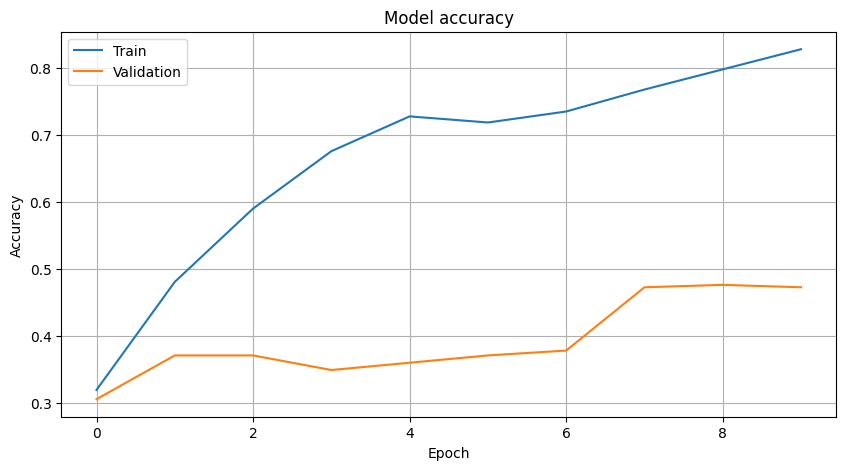

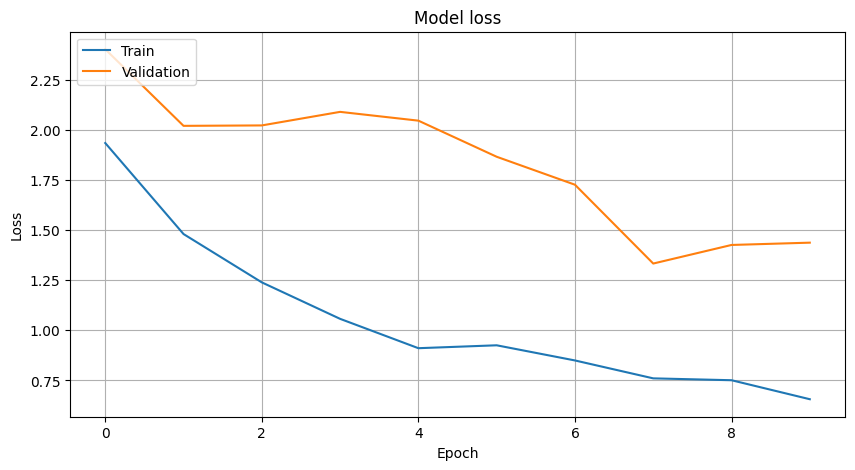

In [38]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)
plt.show()

This too hasnt worked well. The model did not set well on training data but on furthur training, validation loss started increasing. Now lets try Xception.

# **Xception**

In [39]:
Xception_base_model = keras.applications.Xception(include_top=False,
                                         weights="imagenet",
                                         pooling= "max",
                                         classifier_activation="relu")

83683744/83683744 [==============================] - 5s 0us/step


In [40]:
big_cat_classifier_Xception_model = Sequential([
    #base_model,
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.3),
    layers.RandomContrast(0.05),
    # layers.BatchNormalization(),
    # layers.Conv2D(filters = 32, activation="relu", kernel_size=3, padding="same"),
    # layers.MaxPooling2D(padding="same"),
    # layers.BatchNormalization(),
    # layers.Conv2D(filters = 32, activation="relu", kernel_size=3, padding="same"),
    # layers.MaxPooling2D(padding="same"),
    # layers.BatchNormalization(),
    # layers.Conv2D(filters = 32, activation="relu", kernel_size=3, padding="same"),
    # layers.MaxPooling2D(padding="same"),
    # layers.BatchNormalization(),
    # layers.Conv2D(filters = 32, activation="relu", kernel_size=3, padding="valid"),
    # layers.MaxPooling2D(padding="same"),
    # layers.BatchNormalization(),
    # layers.Conv2D(filters = 32, activation="relu", kernel_size=3, padding="valid"),
    # layers.MaxPooling2D(padding="same"),
    #layers.BatchNormalization(),
    Xception_base_model,
    #layers.Conv2D(filters = 32, activation="relu", kernel_size=3, padding="valid"),
    #layers.MaxPooling2D(padding="same"),
    layers.Flatten(),
    #layers.Dropout(0.5),
    #layers.Dense(64, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(32, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(32, activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(8, activation="softmax"),
])

In [41]:
big_cat_classifier_Xception_model.compile(optimizer="adamax",
    loss = "categorical_crossentropy",
    metrics=["accuracy"])

In [42]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath='Xception_model_checkpoint_{epoch:02d}.weights.h5',
                                      monitor='val_loss',
                                      save_best_only=True,
                                      save_weights_only=True,
                                      verbose=1)

In [43]:
history = big_cat_classifier_Xception_model.fit(X_train,
                                       y_train,
                                       epochs=15,
                                       validation_data=(X_cv,y_cv),
                                       callbacks=[checkpoint_callback])

Epoch 1/15
35/35 [==============================] - ETA: 0s - loss: 1.8450 - accuracy: 0.3266
Epoch 1: val_loss improved from inf to 1.50824, saving model to Xception_model_checkpoint_01.weights.h5
35/35 [==============================] - 49s 525ms/step - loss: 1.8450 - accuracy: 0.3266 - val_loss: 1.5082 - val_accuracy: 0.4982
Epoch 2/15
35/35 [==============================] - ETA: 0s - loss: 1.2911 - accuracy: 0.5593
Epoch 2: val_loss improved from 1.50824 to 1.27317, saving model to Xception_model_checkpoint_02.weights.h5
35/35 [==============================] - 12s 346ms/step - loss: 1.2911 - accuracy: 0.5593 - val_loss: 1.2732 - val_accuracy: 0.5964
Epoch 3/15
35/35 [==============================] - ETA: 0s - loss: 1.0291 - accuracy: 0.6807
Epoch 3: val_loss improved from 1.27317 to 0.79357, saving model to Xception_model_checkpoint_03.weights.h5
35/35 [==============================] - 13s 367ms/step - loss: 1.0291 - accuracy: 0.6807 - val_loss: 0.7936 - val_accuracy: 0.7345
Ep

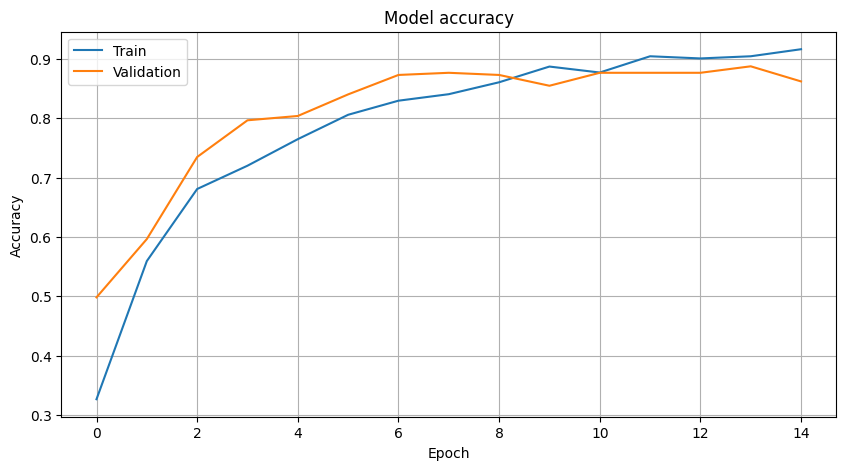

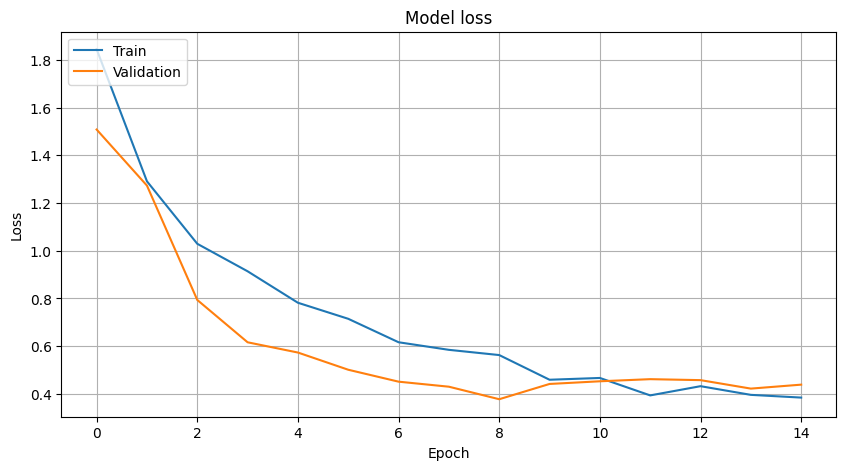

In [44]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)
plt.show()

This model has fitted pretty well. But one thing is peculiar here. The model worked better on validation set than the training set. This suggests that we dont have enough varied data in validation set.

Now we will import some untrained images and check.

remember that:-

0: black panther

1: cat

2: cheetah

3: jaguar

4: leopard

5: lion

6: puma

7: tiger

In [45]:
big_cat_classifier_Xception_model.load_weights("/content/Xception_model_checkpoint_09.weights.h5")

In [46]:
prediction_dict = {
    0: "black panther",
    1: "cat",
    2: "cheetah",
    3: "jaguar",
    4: "leopard",
    5: "lion",
    6: "puma",
    7: "tiger",
}

In [47]:
model_json = big_cat_classifier_Xception_model.to_json()
with open("Xception_model1_architecture.json", "w") as json_file:
    json_file.write(model_json)

big_cat_classifier_Xception_model.save_weights("Xception_model1_weights.h5")

In [48]:
def image_processer(image):
    image = cv.resize(image, (180,180))
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    image = image/255
    image = np.array([image])
    return image

In [49]:
imgs = []
for file in os.listdir("."):
    if file[-3:]=="jpg" or file[-4:]=="jpeg":
        file = plt.imread(file)
        imgs.append(file)

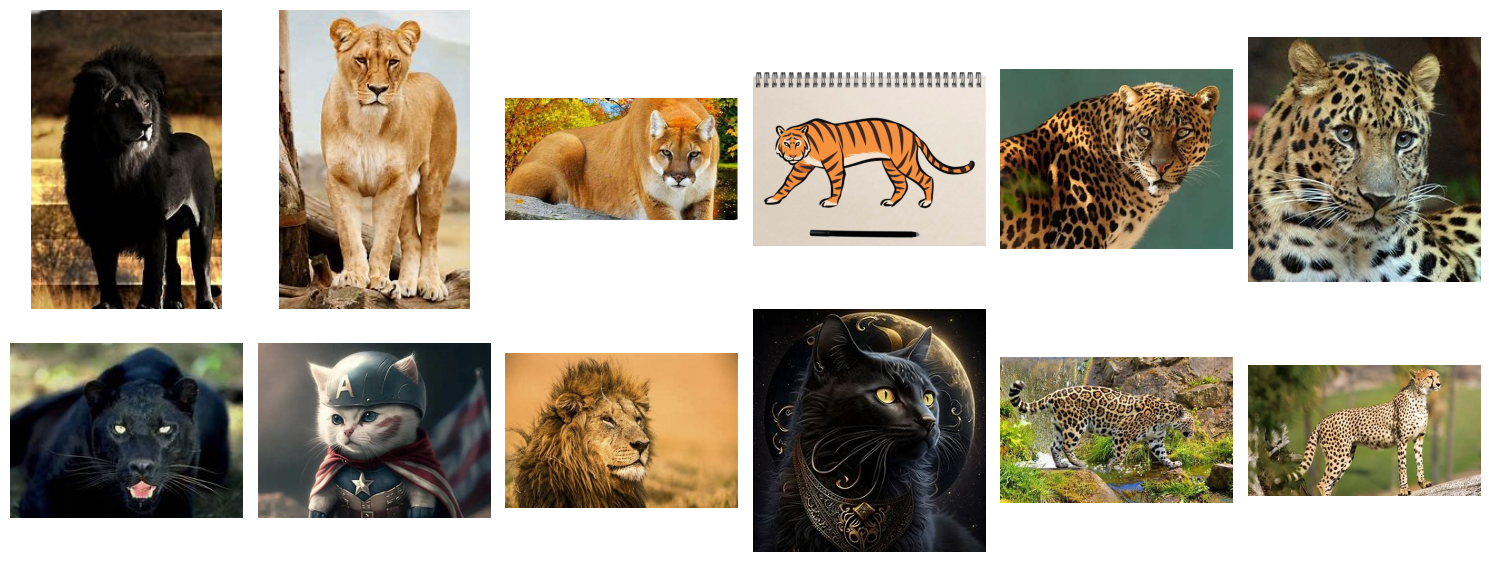

In [50]:
# Create a figure with 2 rows and 6 columns
fig, axes = plt.subplots(2, 6, figsize=(15, 6))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each image
for i, ax in enumerate(axes):
    ax.imshow(imgs[i], cmap='gray')
    ax.axis('off')  # Hide the axis

plt.tight_layout()
plt.show()

In [51]:
images = []
for file in os.listdir("."):
    if file[-3:]=="jpg" or file[-4:]=="jpeg":
        file = cv.imread(file)
        file = image_processer(file)
        prediction = big_cat_classifier_Xception_model.predict(file)
        animal = prediction_dict[np.argmax(prediction)]
        images.append([prediction, animal])
images

1/1 [==============================] - 0s 77ms/step


[[array([[0.6863693 , 0.09765448, 0.0373405 , 0.01730969, 0.02095058,
          0.12034494, 0.00380647, 0.01622399]], dtype=float32),
  'black panther'],
 [array([[0.014035  , 0.01991655, 0.04744862, 0.01115936, 0.00535516,
          0.86961854, 0.01599421, 0.01647248]], dtype=float32),
  'lion'],
 [array([[2.0877486e-03, 1.6762026e-03, 2.7824342e-04, 7.5943358e-03,
          1.4790299e-03, 2.1750929e-02, 9.6037579e-01, 4.7576474e-03]],
        dtype=float32),
  'puma'],
 [array([[0.04909354, 0.02836262, 0.03898752, 0.00878585, 0.04396034,
          0.01926254, 0.02442908, 0.7871185 ]], dtype=float32),
  'tiger'],
 [array([[0.02109864, 0.01216923, 0.00846971, 0.35097846, 0.5851912 ,
          0.00193277, 0.00973992, 0.0104201 ]], dtype=float32),
  'leopard'],
 [array([[0.03588204, 0.01846695, 0.01154218, 0.1671227 , 0.74330854,
          0.00157186, 0.00885608, 0.01324966]], dtype=float32),
  'leopard'],
 [array([[0.94365966, 0.01068919, 0.00642108, 0.00753066, 0.01878005,
          0.

By domain knowledge we know that the jaguars and and the leopards look very similar and its difficult for even humans to identify between them. Same case can be said for the lionesses and pumas. Another thing is that our model might have learnt or have a tendency to predict any black animal or dark image as black panther.

To Solve this problem, we train our model on things which it is more likely to predict wrong. So we created a dataset of black colored cats, darker images of animals, images of lionesses, and most importantly images of patterns o the bodies of leopard and jaguars.

In [52]:
coorection_image_folder_path = "/content/drive/MyDrive/correction/correction"
list_of_folders_ = os.listdir(coorection_image_folder_path)
list_of_folders_

['lion', 'jaguar', 'leopard', 'cat']

In [53]:
images_path_list_corr = []
label_list_corr = []
for folder in list_of_folders_:
    folder_path = os.path.join(coorection_image_folder_path,folder)
    images = os.listdir(folder_path)
    for image in images:
        image_path = os.path.join(folder_path,image)
        images_path_list_corr.append(image_path)
        label_list_corr.append(folder)

In [54]:
images_path_list_corr = np.array(images_path_list_corr)
label_list_corr = np.array(label_list_corr)

In [55]:
len(images_path_list_corr)

328

In [56]:
len(label_list_corr)

328

In [57]:
x_train_corr, x_cv_corr, y_train_corr, y_cv_corr = train_test_split(images_path_list_corr,
                                                                    label_list_corr,
                                                                    test_size = 0.15)

In [58]:
y_train_corr= from_simple_array_to_categorical(y_train_corr)
y_cv_corr= from_simple_array_to_categorical(y_cv_corr)

In [59]:
X_train_corr = []
for imagepath in x_train_corr:
  img = cv.imread(imagepath)
  img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  img = cv.resize(img, (180,180))
  X_train_corr.append(img)

In [60]:
X_cv_corr = []
for imagepath in x_cv_corr:
  img = cv.imread(imagepath)
  img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  img = cv.resize(img, (180,180))
  X_cv_corr.append(img)

array([[[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       ...,

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]]], dtype=uint8)
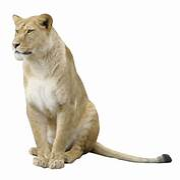

In [61]:
X_train_corr[0]

In [62]:
y_train_corr[0]

array([0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

array([[[247, 244, 235],
        [252, 254, 252],
        [251, 255, 254],
        ...,
        [147, 120,  84],
        [147, 122,  86],
        [150, 129,  97]],

       [[249, 246, 235],
        [253, 254, 250],
        [252, 254, 252],
        ...,
        [223, 201, 160],
        [216, 196, 158],
        [212, 194, 158]],

       [[240, 238, 225],
        [252, 254, 248],
        [249, 250, 246],
        ...,
        [255, 238, 215],
        [254, 236, 215],
        [250, 232, 210]],

       ...,

       [[127, 120, 111],
        [251, 254, 250],
        [250, 252, 252],
        ...,
        [127, 116,  86],
        [121, 108,  82],
        [118, 106,  82]],

       [[117, 111, 101],
        [250, 254, 249],
        [251, 254, 253],
        ...,
        [ 96,  87,  59],
        [ 88,  78,  53],
        [ 87,  76,  54]],

       [[119, 114, 100],
        [250, 254, 247],
        [248, 251, 250],
        ...,
        [ 90,  83,  58],
        [ 95,  87,  66],
        [ 93,  84,  66]]], dtype=uint8)
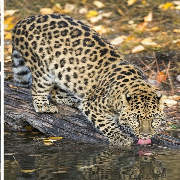

In [63]:
X_cv_corr[0]

In [64]:
y_cv_corr[0]

array([0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [85]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath='Xception_model_corr_checkpoint_{epoch:02d}.weights.h5',
                                      monitor='val_loss',
                                      save_best_only=True,
                                      save_weights_only=True,
                                      verbose=1)

In [66]:
X_train_corr = np.array(X_train_corr)/255
X_cv_corr = np.array(X_cv_corr)/255

In [82]:
X = list(X_train)+list(X_train_corr)
X = np.array(X)

X_test = list(X_cv)+list(X_cv_corr)
X_test = np.array(X_test)

In [83]:
y = list(y_train)+list(y_train_corr)
y = np.array(y)

y_test = list(y_cv)+list(y_cv_corr)
y_test = np.array(y_test)

In [86]:
history = big_cat_classifier_Xception_model.fit(X,
                                       y,
                                       epochs=15,
                                       validation_data=(X_test,y_test),
                                       callbacks=[checkpoint_callback])

Epoch 1/15
43/43 [==============================] - ETA: 0s - loss: 0.1816 - accuracy: 0.9578
Epoch 1: val_loss improved from inf to 0.36840, saving model to Xception_model_corr_checkpoint_01.weights.h5
43/43 [==============================] - 21s 498ms/step - loss: 0.1816 - accuracy: 0.9578 - val_loss: 0.3684 - val_accuracy: 0.9077
Epoch 2/15
43/43 [==============================] - ETA: 0s - loss: 0.1660 - accuracy: 0.9636
Epoch 2: val_loss did not improve from 0.36840
43/43 [==============================] - 14s 336ms/step - loss: 0.1660 - accuracy: 0.9636 - val_loss: 0.4087 - val_accuracy: 0.8892
Epoch 3/15
43/43 [==============================] - ETA: 0s - loss: 0.1349 - accuracy: 0.9731
Epoch 3: val_loss improved from 0.36840 to 0.36024, saving model to Xception_model_corr_checkpoint_03.weights.h5
43/43 [==============================] - 21s 498ms/step - loss: 0.1349 - accuracy: 0.9731 - val_loss: 0.3602 - val_accuracy: 0.9046
Epoch 4/15
43/43 [==============================] - E

best val loss was obtained at 5th epoch which also doesnt have much difference with train_loss. so we load those weights

In [87]:
big_cat_classifier_Xception_model.load_weights("/content/Xception_model_corr_checkpoint_05.weights.h5")

In [88]:
model_json = big_cat_classifier_Xception_model.to_json()
with open("Xception_model3_architecture.json", "w") as json_file:
    json_file.write(model_json)

big_cat_classifier_Xception_model.save_weights("Xception_model3_weights.h5")

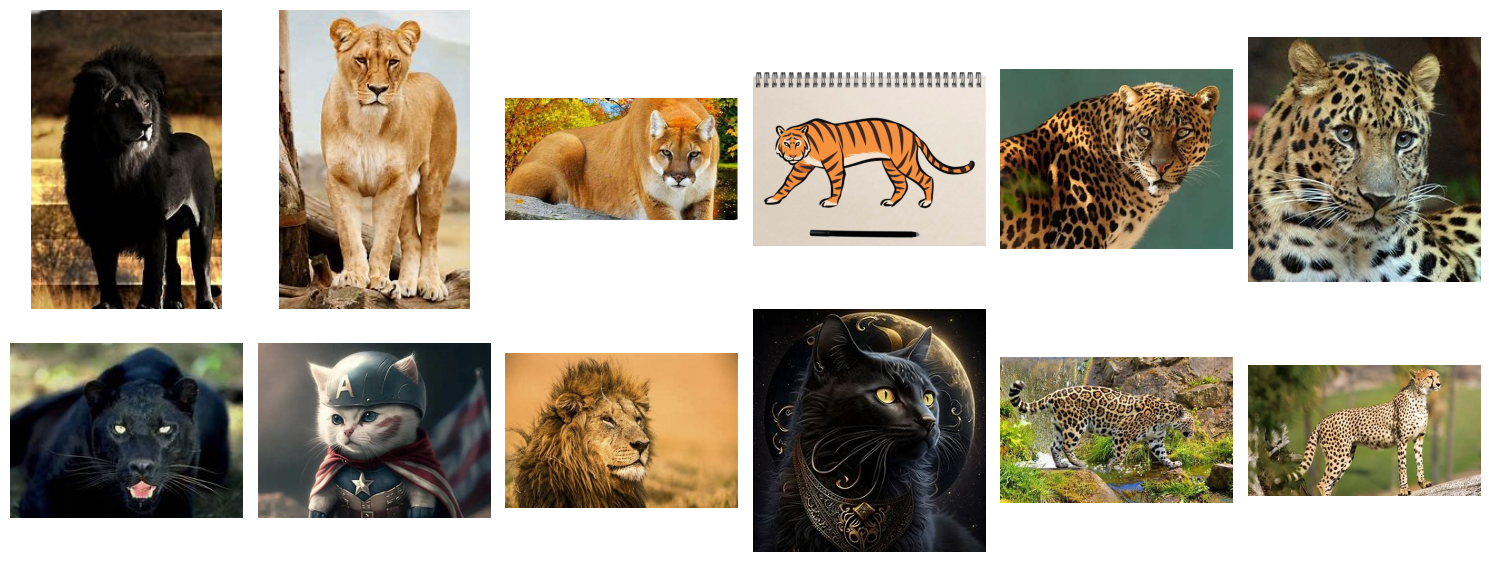

In [89]:
# Create a figure with 2 rows and 6 columns
fig, axes = plt.subplots(2, 6, figsize=(15, 6))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each image
for i, ax in enumerate(axes):
    ax.imshow(imgs[i], cmap='gray')
    ax.axis('off')  # Hide the axis

plt.tight_layout()
plt.show()

In [90]:
images = []
for file in os.listdir("."):
    if file[-3:]=="jpg" or file[-4:]=="jpeg":
        file = cv.imread(file)
        file = image_processer(file)
        prediction = big_cat_classifier_Xception_model.predict(file)
        animal = prediction_dict[np.argmax(prediction)]
        images.append([prediction, animal])
images

1/1 [==============================] - 0s 23ms/step


[[array([[0.14243807, 0.01179501, 0.01443553, 0.00684926, 0.00296517,
          0.8099553 , 0.00457639, 0.0069853 ]], dtype=float32),
  'lion'],
 [array([[1.8837788e-03, 6.3872254e-03, 5.1971870e-03, 5.6457694e-04,
          3.8855587e-04, 9.7734058e-01, 3.1281128e-03, 5.1098848e-03]],
        dtype=float32),
  'lion'],
 [array([[7.3357462e-04, 8.4487803e-04, 2.6028656e-04, 3.3790369e-03,
          2.2141845e-03, 5.2504120e-03, 9.8656464e-01, 7.5303949e-04]],
        dtype=float32),
  'puma'],
 [array([[0.02178089, 0.02184786, 0.03832065, 0.01417717, 0.09742134,
          0.00821866, 0.00658788, 0.7916455 ]], dtype=float32),
  'tiger'],
 [array([[2.0038842e-03, 5.5808318e-04, 3.1516762e-03, 4.6698403e-02,
          9.4497061e-01, 1.0095756e-04, 8.3071290e-04, 1.6856384e-03]],
        dtype=float32),
  'leopard'],
 [array([[1.4099370e-03, 4.1438948e-04, 9.3752827e-04, 1.0739055e-02,
          9.8528415e-01, 2.3521179e-05, 4.0195481e-04, 7.8951148e-04]],
        dtype=float32),
  'leopar

Now we see that the model is relatively more capable to identify darker animals, and also has developed more clarity about clarifying between a jaguar and a leopard. Similarly between a puma and a lioness. We have also been able to increase the accuracy from **87%** to around **93%** which is very good considering the difficulties which even humans can face.